# 캐글러를 대상으로 한 설문조사

- 설문기간 : 2017년 8월 7일부터 8월 25일까지
- 평균 응답 시간은 16.4 분
- 171 개 국가 및 지역에서 16,716 명의 응답자
- 특정 국가 또는 지역에서 응답자가 50 명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
- 설문 조사 시스템에 신고 된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
- 대부분의 응답자는 이메일 목록, 토론 포럼 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
- 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
- 미국 달러로 급여를 계산할 수 있도록 USD로 환산 한 csv를 제공
- 질문은 선택적
- 모든 질문이 모든 응답자에게 보여지는 것은 아님
- 취업을 한 사람과 학생을 나누어 다른 질문을 함
- 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
- 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
- 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정




## Data file 
- schema.csv: 설문 스키마가 있는 csv
- multipleChoiceResponses.csv: 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
- freeformResponses.csv: Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변
- conversionRates.csv: R 패키지 "quantmod"에서 2017 년 9 월 14 일에 액세스 한 통화 변환율
- RespondentTypeREADME.txt: schema.csv 파일의 "Asked"열에 응답을 디코딩하는 스키마

## 데이터 파일

In [1]:
# 노트북 안에서 그래프를 그리기 위해
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
question = pd.read_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/2017 Kaggle Machine Learning & Data Science Survey/Data_sets/schema.csv')

question.shape

(290, 3)

In [3]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [4]:
mcq = pd.read_csv('C:/Users/wkddn/OneDrive/문서/GitHub/Kaggle/kaggle/2017 Kaggle Machine Learning & Data Science Survey/Data_sets/multipleChoiceResponses.csv')
mcq.shape

(16716, 228)

In [5]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

<AxesSubplot:>

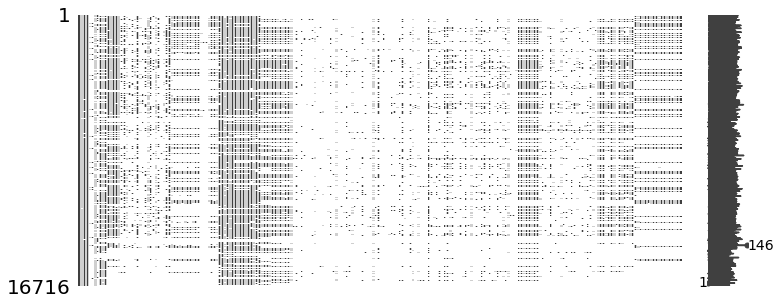

In [7]:
'''
 missingno - NaN 데이터들에 대해 시각화 
 매트릭스가 출력되는데 흰색으로 표현된 빈칸들이 결측치들이다
 결측치가 많은 것을 확인할 수 있다
 16,716 명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. 
 (총 290개의 질문) 응답하지 않은 질문이 많음
 '''
import missingno as msno

msno.matrix(mcq, figsize=(12, 5))

## 설문 통계

<AxesSubplot:xlabel='count', ylabel='GenderSelect'>

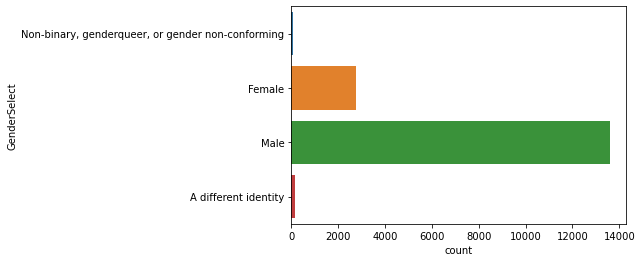

In [8]:
# 성별
# 여성보다는 남성의 비율이 훨씬 높은 편임
sns.countplot(y='GenderSelect', data=mcq)

In [15]:
# 국가별 응답 수
con_df = pd.DataFrame(mcq['Country'].value_counts())
con_df.head()

,Country
United States,4197
India,2704
Other,1023
Russia,578
United Kingdom,535


In [16]:
# country 컬럼을 인덱스로 지정
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기위해 reset_index()를 해줌
con_df = con_df.reset_index().drop('index', axis=1)
# 우리나라는 18위이므로, 20위까지 확인
con_df.head(20)

,응답 수,국가
0,4197,United States
1,2704,India
2,1023,Other
3,578,Russia
4,535,United Kingdom
5,471,People 's Republic of China
6,465,Brazil
7,460,Germany
8,442,France
9,440,Canada


In [17]:
# 연령에 대한 정보 보기
mcq['Age'].describe()

count    16385.000000
mean        32.372841
std         10.473487
min          0.000000
25%         25.000000
50%         30.000000
75%         37.000000
max        100.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Density'>

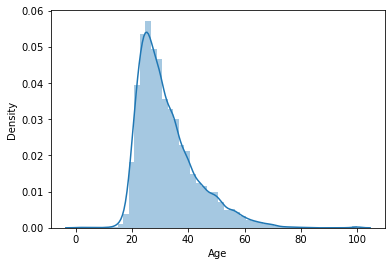

In [18]:
# 응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많음
sns.distplot(mcq[mcq['Age']>0]['Age'])

## 학력

<AxesSubplot:xlabel='count', ylabel='FormalEducation'>

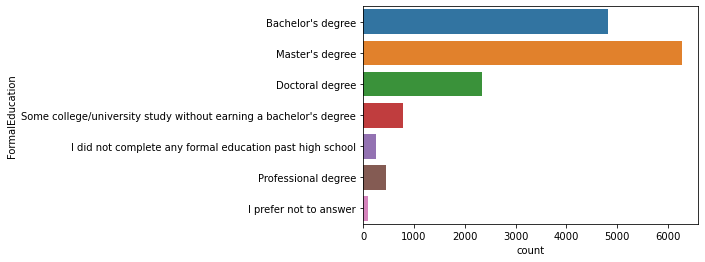

In [19]:
# 석사 > 학사 > 박사 학위 순으로 많다
sns.countplot(y='FormalEducation', data=mcq)

In [20]:
pd.DataFrame(mcq['MajorSelect'].value_counts())

,MajorSelect
Computer Science,4397
Mathematics or statistics,2220
Engineering (non-computer focused),1339
Electrical Engineering,1303
Other,848
Physics,830
"Information technology, networking, or system administration",693
A social science,531
Biology,274
Management information systems,237


## 전공

In [21]:
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts())

mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True))

mcq_major_df = mcq_major_count.merge(
    mcq_major_percent, left_index=True, right_index=True
)
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df

,응답 수,비율
Computer Science,4397,0.331074
Mathematics or statistics,2220,0.167156
Engineering (non-computer focused),1339,0.100821
Electrical Engineering,1303,0.098110
Other,848,0.063851
Physics,830,0.062495
"Information technology, networking, or system administration",693,0.052180
A social science,531,0.039982
Biology,274,0.020631
Management information systems,237,0.017845


### 컴퓨터 전공이 33%로 가장 많으며, 다음으로 수학,공학,전기 공학 순

<AxesSubplot:xlabel='count', ylabel='MajorSelect'>

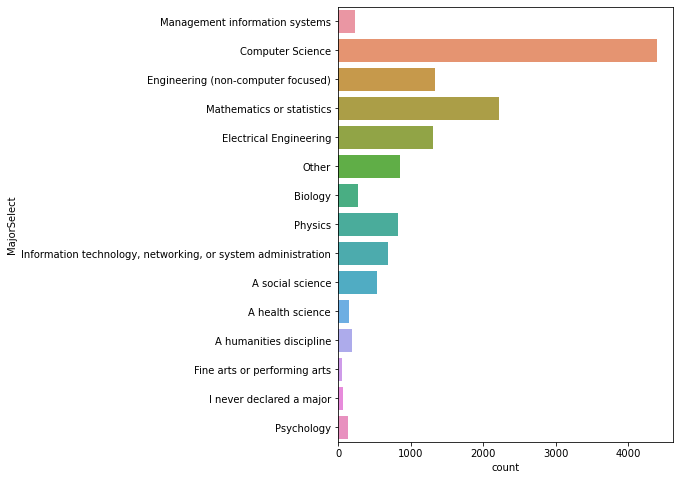

In [22]:
# 재학중인 사람들의 전공 현황
plt.figure(figsize=(6, 8))
sns.countplot(y='MajorSelect', data=mcq)

## 취업 여부

In [23]:
mcq_es_count = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts())
mcq_es_percent = pd.DataFrame(
    mcq['EmploymentStatus'].value_counts(normalize=True))
mcq_es_df = mcq_es_count.merge(
    mcq_es_percent, left_index=True, right_index=True)
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,10897,0.651890
"Not employed, but looking for work",2110,0.126226
"Independent contractor, freelancer, or self-employed",1330,0.079564
"Not employed, and not looking for work",924,0.055276
Employed part-time,917,0.054858
I prefer not to say,420,0.025126
Retired,118,0.007059


<AxesSubplot:xlabel='count', ylabel='EmploymentStatus'>

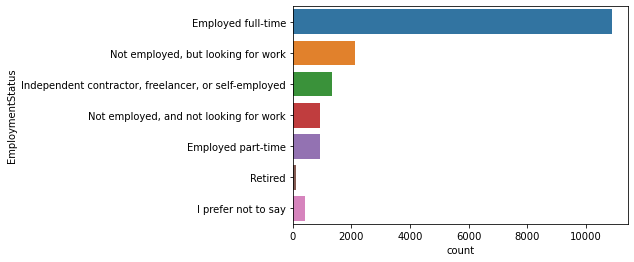

In [24]:
sns.countplot(y='EmploymentStatus', data=mcq)

### 응답자의 65%가 풀타임으로 일하고 있으며, 그 다음으로는 구직자가 12%다.

## 프로그래밍 경험

<AxesSubplot:xlabel='count', ylabel='Tenure'>

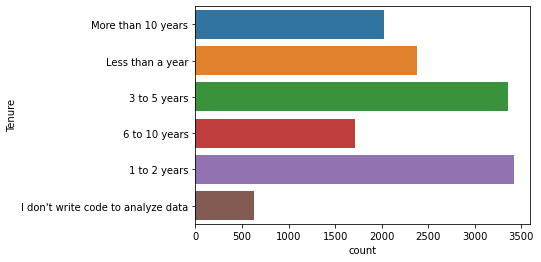

In [25]:
# 'Tenure 항목은 데이터 사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 194


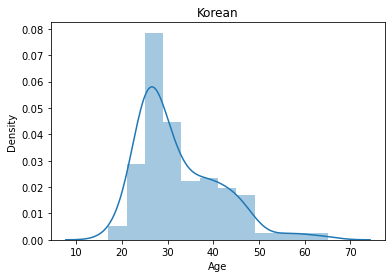

In [26]:
# 20대 후반과 30대 초반이 가장 많음
korea = mcq.loc[(mcq['Country']=='South Korea')]

print('The number of interviewees in Korea: ' + str(korea.shape[0]))

sns.distplot(korea['Age'].dropna())
plt.title('Korean')
plt.show()

In [28]:
pd.DataFrame(korea['GenderSelect'].value_counts())

,GenderSelect
Male,156
Female,37
A different identity,1


Text(0.5, 1.0, 'Korean')

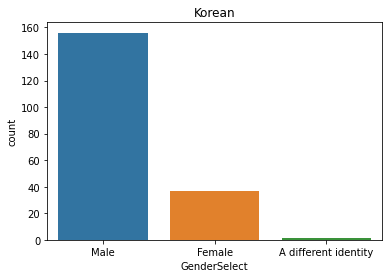

In [29]:
sns.countplot(x='GenderSelect', data=korea)
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

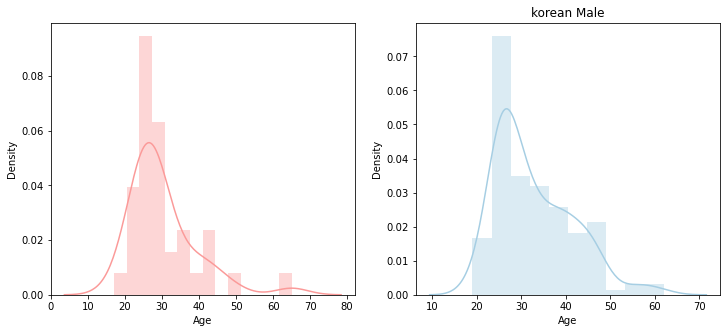

In [34]:
# 그래프를 여러 개를 그릴 수 있음 
figure, (ax1, ax2) = plt.subplots(ncols=2)

figure.set_size_inches(12,5)
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')

sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(), 
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

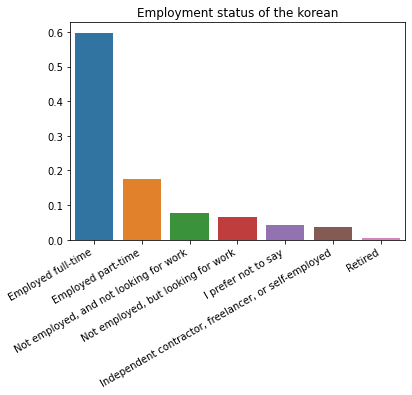

In [35]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts()/len(korea))
plt.xticks(rotation=30, ha='right')
plt.title('Employment status of the korean')
plt.ylabel('')
plt.show()

- 우리나라 대부분이 풀타임으로 일하고 있음

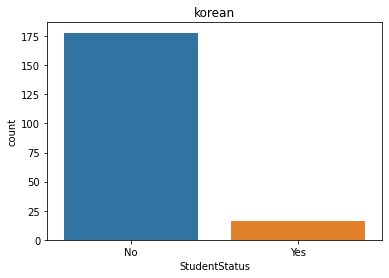

In [36]:
# 학생인지 아닌지 확인
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [37]:
full_time = mcq.loc[(mcq['EmploymentStatus'] == 'Employed full-time')]
print(full_time.shape)
looking_for_job = mcq.loc[(
    mcq['EmploymentStatus'] == 'Not employed, but looking for work')]
print(looking_for_job.shape)

(10897, 228)
(2110, 228)
